In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\ILYA\\Desktop\\Python code\\Data Science\\Нейросети\\Titanic battle'

In [3]:
os.chdir('C:\\Users\ILYA\Desktop\Python code\Data Science\Нейросети\Titanic battle')

# Importing dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [5]:
data = pd.read_csv('titanik_full_data.csv',sep='\t')

In [339]:
clear_data = pd.read_csv('TitanicCleanData.csv',encoding= 'unicode_escape')

In [340]:
clear_data.head()

,PassengerId,Survived,Pclass,Name,NameLength,Sex,SibSpouse,ParentsChild,TicketNumber,Cabin,Age_Months,HometownCountry,Boarded,Destination,DestinationCountry,Lifeboat,LifeboatSupport,Fare_new
0,1,0.0,3,"Braund, Mr. Owen Harris",23,male,1,0,A/5 21171,NaN,264,England,Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Canada,NaN,No,1.945910
1,2,1.0,1,"Cumings, Mrs. John Bradley",27,female,1,0,PC 17599,C85,420,US,Cherbourg,"New York, New York, US",US,4,Yes,4.262680
2,3,1.0,3,"Heikkinen, Miss. Laina",22,female,0,0,STON/O2. 3101282,NaN,312,Finland,Southampton,New York City,US,14,Yes,1.945910
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath",29,female,1,0,113803,C123,420,US,Southampton,"Scituate, Massachusetts, US",US,D,Yes,3.970292
4,5,0.0,3,"Allen, Mr. William Henry",24,male,0,0,373450,NaN,420,England,Southampton,New York City,US,NaN,No,2.079442


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(1309, 12)

In [341]:
clear_data.shape

(1270, 18)

In [331]:
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1270 non-null   int64  
 1   Survived            864 non-null    float64
 2   Pclass              1270 non-null   int64  
 3   Name                1270 non-null   object 
 4   NameLength          1270 non-null   int64  
 5   Sex                 1270 non-null   object 
 6   SibSpouse           1270 non-null   int64  
 7   ParentsChild        1270 non-null   int64  
 8   TicketNumber        1270 non-null   object 
 9   Cabin               290 non-null    object 
 10  Age_Months          1270 non-null   int64  
 11  HometownCountry     1265 non-null   object 
 12  Boarded             1265 non-null   object 
 13  Destination         1265 non-null   object 
 14  DestinationCountry  1265 non-null   object 
 15  Lifeboat            483 non-null    object 
 16  Lifebo

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [343]:
clear_X = clear_data.drop(['Name','TicketNumber','Cabin','Lifeboat'],axis=1)

In [344]:
clear_data.head()

,PassengerId,Survived,Pclass,Name,NameLength,Sex,SibSpouse,ParentsChild,TicketNumber,Cabin,Age_Months,HometownCountry,Boarded,Destination,DestinationCountry,Lifeboat,LifeboatSupport,Fare_new
0,1,0.0,3,"Braund, Mr. Owen Harris",23,male,1,0,A/5 21171,NaN,264,England,Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Canada,NaN,No,1.945910
1,2,1.0,1,"Cumings, Mrs. John Bradley",27,female,1,0,PC 17599,C85,420,US,Cherbourg,"New York, New York, US",US,4,Yes,4.262680
2,3,1.0,3,"Heikkinen, Miss. Laina",22,female,0,0,STON/O2. 3101282,NaN,312,Finland,Southampton,New York City,US,14,Yes,1.945910
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath",29,female,1,0,113803,C123,420,US,Southampton,"Scituate, Massachusetts, US",US,D,Yes,3.970292
4,5,0.0,3,"Allen, Mr. William Henry",24,male,0,0,373450,NaN,420,England,Southampton,New York City,US,NaN,No,2.079442


In [345]:
clear_X.head()

,PassengerId,Survived,Pclass,NameLength,Sex,SibSpouse,ParentsChild,Age_Months,HometownCountry,Boarded,Destination,DestinationCountry,LifeboatSupport,Fare_new
0,1,0.0,3,23,male,1,0,264,England,Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Canada,No,1.945910
1,2,1.0,1,27,female,1,0,420,US,Cherbourg,"New York, New York, US",US,Yes,4.262680
2,3,1.0,3,22,female,0,0,312,Finland,Southampton,New York City,US,Yes,1.945910
3,4,1.0,1,29,female,1,0,420,US,Southampton,"Scituate, Massachusetts, US",US,Yes,3.970292
4,5,0.0,3,24,male,0,0,420,England,Southampton,New York City,US,No,2.079442


In [347]:
clear_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1270 non-null   int64  
 1   Survived            864 non-null    float64
 2   Pclass              1270 non-null   int64  
 3   NameLength          1270 non-null   int64  
 4   Sex                 1270 non-null   object 
 5   SibSpouse           1270 non-null   int64  
 6   ParentsChild        1270 non-null   int64  
 7   Age_Months          1270 non-null   int64  
 8   HometownCountry     1265 non-null   object 
 9   Boarded             1265 non-null   object 
 10  Destination         1265 non-null   object 
 11  DestinationCountry  1265 non-null   object 
 12  LifeboatSupport     1270 non-null   object 
 13  Fare_new            1270 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 139.0+ KB


In [11]:
X['Pclass'] = X['Pclass'].astype('category')
X['Sex'] = X['Sex'].astype('category')
X['Embarked'] = X['Embarked'].astype('category')

In [12]:
X['Age'] = X['Age'].fillna(X['Age'].mean())

In [13]:
X = X.dropna()

In [348]:
clear_X = clear_X.dropna()

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1306 non-null   int64   
 1   Pclass    1306 non-null   category
 2   Sex       1306 non-null   category
 3   Age       1306 non-null   float64 
 4   SibSp     1306 non-null   int64   
 5   Parch     1306 non-null   int64   
 6   Fare      1306 non-null   float64 
 7   Embarked  1306 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 65.3 KB


In [349]:
clear_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 863
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         862 non-null    int64  
 1   Survived            862 non-null    float64
 2   Pclass              862 non-null    int64  
 3   NameLength          862 non-null    int64  
 4   Sex                 862 non-null    object 
 5   SibSpouse           862 non-null    int64  
 6   ParentsChild        862 non-null    int64  
 7   Age_Months          862 non-null    int64  
 8   HometownCountry     862 non-null    object 
 9   Boarded             862 non-null    object 
 10  Destination         862 non-null    object 
 11  DestinationCountry  862 non-null    object 
 12  LifeboatSupport     862 non-null    object 
 13  Fare_new            862 non-null    float64
dtypes: float64(2), int64(6), object(6)
memory usage: 101.0+ KB


In [15]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
X = pd.get_dummies(X)

In [350]:
clear_X = pd.get_dummies(clear_X)

In [17]:
X.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [351]:
clear_X.head()

,PassengerId,Survived,Pclass,NameLength,SibSpouse,ParentsChild,Age_Months,Fare_new,Sex_female,Sex_male,...,DestinationCountry_Canada,DestinationCountry_Cuba,DestinationCountry_Haiti,DestinationCountry_Japan,DestinationCountry_Mexico,DestinationCountry_Peru,DestinationCountry_US,DestinationCountry_Uruguay,LifeboatSupport_No,LifeboatSupport_Yes
0,1,0.0,3,23,1,0,264,1.945910,0,1,...,1,0,0,0,0,0,0,0,1,0
1,2,1.0,1,27,1,0,420,4.262680,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3,1.0,3,22,0,0,312,1.945910,1,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1.0,1,29,1,0,420,3.970292,1,0,...,0,0,0,0,0,0,1,0,0,1
4,5,0.0,3,24,0,0,420,2.079442,0,1,...,0,0,0,0,0,0,1,0,1,0


In [353]:
clear_X.shape

(862, 298)

In [75]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [26]:
y = X['Survived']
X = X.drop('Survived',axis = 1)

In [354]:
clear_y = clear_X['Survived']
clear_X = clear_X.drop('Survived',axis = 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42 )

In [355]:
cX_train, cX_test, cy_train, cy_test = train_test_split(clear_X,clear_y,test_size=0.33, random_state=42 )

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rnd_clf = RandomForestClassifier()

In [35]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier()

In [357]:
rnd_clf.fit(cX_train,cy_train)

RandomForestClassifier()

In [36]:
from sklearn.metrics import accuracy_score

In [361]:
cy_pred = rnd_clf.predict(cX_test)

In [362]:
accuracy_score(cy_pred,cy_test)

0.9964912280701754

## Другой классификатор

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
grb_clf = GradientBoostingClassifier()

In [363]:
grb_clf.fit(cX_train,cy_train)

GradientBoostingClassifier()

In [44]:
cy_pred = grb_clf.predict(cX_test)

In [364]:
accuracy_score(cy_pred,cy_test)

0.9964912280701754

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {'n_estimators':range(50,150,25),
          'learning_rate':[0.001,0.01,0.1,1],
          'min_samples_split':range(2,5),
         'min_samples_leaf':range(1,11,5),
         'max_depth':range(3,6)}

In [50]:
grid_clf = GridSearchCV(estimator=grb_clf, param_grid=params, cv=5)

In [55]:
#grid_clf.fit(X_train,y_train)
'''
{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 100}
 '''

"\n{'learning_rate': 0.1,\n 'max_depth': 3,\n 'min_samples_leaf': 6,\n 'min_samples_split': 3,\n 'n_estimators': 100}\n "

In [53]:
grid_clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 100}

In [54]:
best_clf = grid_clf.best_estimator_

In [56]:
best_clf.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_leaf=6, min_samples_split=3)

In [58]:
y_pred = best_clf.predict(X_test)
accuracy_score(y_pred,y_test)
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(y_pred,y_test)

0.8457732149463559

In [60]:
y_pred_2 = grb_clf.predict(X_test)
print('Acc:',accuracy_score(y_pred_2,y_test))
print(roc_auc_score(y_pred_2,y_test))


Acc: 0.8631090487238979
0.8586150136783048


In [61]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

## Реформирование данных

In [68]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)


In [368]:
cX_train_np = np.array(cX_train)
cX_test_np = np.array(cX_test)
cy_train_np = np.array(cy_train)
cy_test_np = np.array(cy_test)


In [69]:
X_train_torch = torch.Tensor(X_train_np)
X_test_torch = torch.Tensor(X_test_np)
y_train_torch = torch.Tensor(y_train_np)
y_test_torch = torch.Tensor(y_test_np)

In [369]:
cX_train_torch = torch.Tensor(cX_train_np)
cX_test_torch = torch.Tensor(cX_test_np)
cy_train_torch = torch.Tensor(cy_train_np)
cy_test_torch = torch.Tensor(cy_test_np)

In [70]:
X_train_torch.shape, X_test_torch.shape, y_train_torch.shape, y_test_torch.shape

(torch.Size([875, 12]),
 torch.Size([431, 12]),
 torch.Size([875]),
 torch.Size([431]))

In [71]:
y_train_torch = y_train_torch.unsqueeze(1)

In [73]:
y_test_torch = y_test_torch.unsqueeze(1)

In [370]:
cy_train_torch = cy_train_torch.unsqueeze(1)
cy_test_torch = cy_test_torch.unsqueeze(1)

In [376]:
class TitanicNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(TitanicNet,self).__init__()
        self.fc1 = torch.nn.Linear(cX_train.shape[1], n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        #self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
        #self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,1)
        # self.act2 = torch.nn.Tanh()
    # self.sm = torch.nn.Softmax(dim=1)
    def forward(self,x):
        x = self.fc1(x)
        x = self.act1(x)
        #x = self.fc2(x)
        #x = self.act2(x)
        x = self.fc3(x)
        # x = self.act2(x)
        return x 

In [383]:
titanic_net = TitanicNet(10)

In [384]:
loss = torch.nn.MSELoss()

In [385]:
optimizer = torch.optim.Adam(titanic_net.parameters(), lr=5.0e-4)

In [386]:
batch_size = 15

In [387]:
test_accuracy_history = []
test_loss_history = []

In [306]:
for epoch in range(400):
    order = np.random.permutation(len(X_train_torch))
    for start_index in range(0,len(X_train_torch),batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train_torch[batch_indexes]
        y_batch = y_train_torch[batch_indexes]
        preds = titanic_net.forward(x_batch)
        loss_val = loss(preds,y_batch)
        loss_val.backward()
        optimizer.step()
    if epoch % 10 == 9:
        test_preds = titanic_net.forward(X_test_torch)

        test_loss_history.append(loss(test_preds,y_test_torch))

        accuracy = (test_preds.round() == y_test_torch).float().mean()

        test_accuracy_history.append(accuracy)

        print('Epoch',epoch,loss(test_preds,y_test_torch),accuracy)
    

Epoch 9 tensor(0.1350, grad_fn=<MseLossBackward>) tensor(0.8399)
Epoch 19 tensor(0.1172, grad_fn=<MseLossBackward>) tensor(0.8608)
Epoch 29 tensor(0.1139, grad_fn=<MseLossBackward>) tensor(0.8654)
Epoch 39 tensor(0.1124, grad_fn=<MseLossBackward>) tensor(0.8538)
Epoch 49 tensor(0.1097, grad_fn=<MseLossBackward>) tensor(0.8654)
Epoch 59 tensor(0.1101, grad_fn=<MseLossBackward>) tensor(0.8654)
Epoch 69 tensor(0.1102, grad_fn=<MseLossBackward>) tensor(0.8677)
Epoch 79 tensor(0.1107, grad_fn=<MseLossBackward>) tensor(0.8677)
Epoch 89 tensor(0.1105, grad_fn=<MseLossBackward>) tensor(0.8701)
Epoch 99 tensor(0.1108, grad_fn=<MseLossBackward>) tensor(0.8677)
Epoch 109 tensor(0.1090, grad_fn=<MseLossBackward>) tensor(0.8677)
Epoch 119 tensor(0.1098, grad_fn=<MseLossBackward>) tensor(0.8677)
Epoch 129 tensor(0.1106, grad_fn=<MseLossBackward>) tensor(0.8701)
Epoch 139 tensor(0.1088, grad_fn=<MseLossBackward>) tensor(0.8677)
Epoch 149 tensor(0.1093, grad_fn=<MseLossBackward>) tensor(0.8724)
Epoch 

In [388]:
for epoch in range(400):
    order = np.random.permutation(len(cX_train_torch))
    for start_index in range(0,len(cX_train_torch),batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = cX_train_torch[batch_indexes]
        y_batch = cy_train_torch[batch_indexes]
        preds = titanic_net.forward(x_batch)
        loss_val = loss(preds,y_batch)
        loss_val.backward()
        optimizer.step()
    if epoch % 10 == 9:
        test_preds = titanic_net.forward(cX_test_torch)

        test_loss_history.append(loss(test_preds,cy_test_torch))

        accuracy = (test_preds.round() == cy_test_torch).float().mean()

        test_accuracy_history.append(accuracy)

        print('Epoch',epoch,loss(test_preds,cy_test_torch),accuracy)
    

Epoch 9 tensor(0.2210, grad_fn=<MseLossBackward>) tensor(0.6596)
Epoch 19 tensor(0.1765, grad_fn=<MseLossBackward>) tensor(0.7228)
Epoch 29 tensor(0.0601, grad_fn=<MseLossBackward>) tensor(0.9228)
Epoch 39 tensor(0.0217, grad_fn=<MseLossBackward>) tensor(0.9930)
Epoch 49 tensor(0.0207, grad_fn=<MseLossBackward>) tensor(0.9895)
Epoch 59 tensor(0.0235, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 69 tensor(0.0195, grad_fn=<MseLossBackward>) tensor(0.9930)
Epoch 79 tensor(0.0115, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 89 tensor(0.0131, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 99 tensor(0.0117, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 109 tensor(0.0113, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 119 tensor(0.0154, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 129 tensor(0.0125, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 139 tensor(0.0111, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 149 tensor(0.0120, grad_fn=<MseLossBackward>) tensor(0.9965)
Epoch 

No handles with labels found to put in legend.


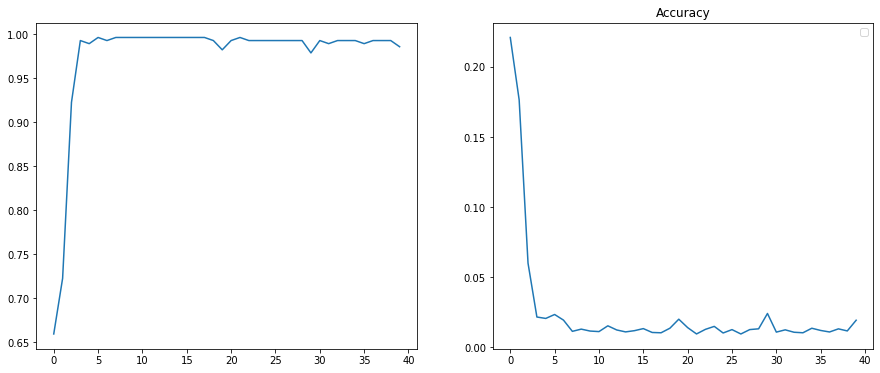

In [389]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(test_accuracy_history)
plt.subplot(122)
plt.plot(test_loss_history)
plt.title('Accuracy')
plt.legend()


In [312]:
pres_1 = titanic_net.forward(X_test_torch).detach().numpy().reshape(-1)

In [314]:
y_test_1 = np.array(y_test)

In [318]:
pres1 = pres_1.round()

In [321]:
pres1.shape, y_test_1.shape

((431,), (431,))

In [322]:
(pres1 == y_test_1).mean()

0.8654292343387471

In [323]:
roc_auc_score(pres1,y_test_1)

0.8680009645526886